In [ ]:
# 데이터셋 찾아보기

# https://velog.io/@sukong/%EC%A0%95%EB%A6%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EC%82%AC%EC%9D%B4%ED%8A%B8
# 한국주택금융공사_주택금융관련 지수 - https://www.data.go.kr/data/3072325/fileData.do
# 한국주택금융공사_주택담보노후연금보증 현황 - https://www.data.go.kr/data/3045814/fileData.do
# ★ 한국주택금융공사_일반주택담보대출현황 - https://www.data.go.kr/data/15012873/fileData.do

In [8]:
# 한글 폰트 다운로드

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [46]:
# 파일 불러오기

from google.colab import files
uploaded = files.upload()

Saving 한국주택금융공사_일반주택담보대출현황_20150101.csv to 한국주택금융공사_일반주택담보대출현황_20150101 (5).csv


In [47]:
import pandas as pd

# CSV 파일 경로 설정
file_path = '한국주택금융공사_일반주택담보대출현황_20150101.csv'

# CSV 파일 불러오기
data = pd.read_csv(file_path, encoding='cp949')

# 데이터 확인
print(data)

                구분  사례수(명)  매우 불만이다  불만이다  보통이다  만족한다  매우 만족한다    계   평균
0               서울     266      1.5  13.2  56.0  27.1      2.3  100  3.2
1               경기     422      4.3  11.8  49.1  31.3      3.6  100  3.2
2              광역시     448      1.8   9.8  57.8  29.0      1.6  100  3.2
3             지방도시     426      1.6  11.0  55.2  30.5      1.6  100  3.2
4              20대      46      0.0  21.7  52.2  21.7      4.3  100  3.1
5              30대     371      1.6   7.8  55.5  33.7      1.3  100  3.3
6              40대     645      2.8  11.9  53.3  28.7      3.3  100  3.2
7              50대     500      2.6  12.0  55.2  28.8      1.4  100  3.1
8         221만원 미만     130      7.7  14.6  48.5  26.9      2.3  100  3.0
9      221만원-340만원     279      2.2  10.0  62.7  24.4      0.7  100  3.1
10     341만원-450만원     330      2.7  13.6  53.6  28.5      1.5  100  3.1
11     451만원-620만원     400      1.3   9.7  50.5  35.8      2.8  100  3.3
12        621만원 이상     423      1.7  10.6  55.1  29

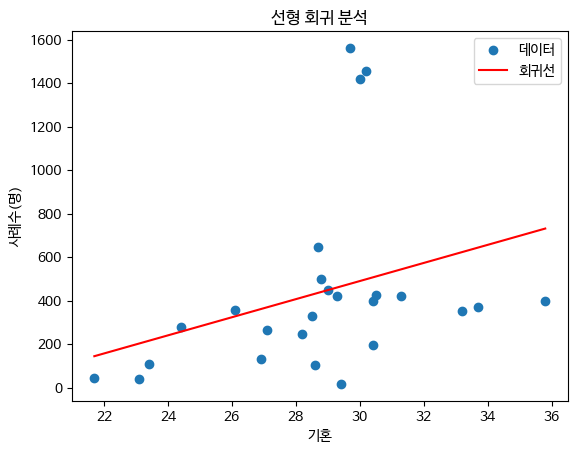

회귀식: 사례수(명) = -758.85 + 41.63 * 기혼


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 데이터 불러오기
data = pd.read_csv(file_path, encoding='cp949')  # 데이터 파일 형식에 따라 인코딩 설정 필요할 수 있음

# 독립변수와 종속변수 선택
# x = data['기혼'].values.reshape(-1, 1)
y = data['사례수(명)'].values

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(x, y)

# 회귀선 생성
x_range = np.linspace(x.min(), x.max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))

# 그래프 그리기
plt.scatter(x, y, label='데이터')
plt.plot(x_range, y_pred, color='red', label='회귀선')
plt.xlabel('기혼')
plt.ylabel('사례수(명)')
plt.legend()
plt.title('선형 회귀 분석')
plt.show()

# 회귀식 출력
print(f'회귀식: 사례수(명) = {model.intercept_:.2f} + {model.coef_[0]:.2f} * 기혼')
